# Asg solutions


## In your Zipped submission, please include this Asg6 ipynb Jove file PLUS the files requested below (parse-tree drawings)



# =============

## (1) The first question is worth 25%. It asks you to design a CFG for (by now, our favorite) Lif language. Then, to test this CFG out, it asks you to directly convert the CFG to a PDA using the method described in class (and around Figure 12.12 of the book; the algorithm starts on Page 175).

#  =============

## (2) This question has two parts

### Part (a)  For 12%, you must first run Calculator_with_Parse_Tree_Drawing.ipynb. There you'll notice that you are given a Jove-based parser that parses expressions and calculates expressions. You'll be asked to compare this parser against Python's parser (by running Python on those expressions). If there are answer-differences, you are asked to look at the parse-trees generated by Jove and find out why you got Jove's answers. Then by suitably parenthesizing the Python expressions, you'll know what precedences Python assigned. 

## For Question 2(a), you'll be answering four questions Q1,2,3,4 as answers A1,2,3,4 in the space below.

#  =============

### Part (b)  For 13%, you will be first running  Drive_PDA_Based_Parsing.ipynb. There you will be running  two CFGs on PDA. They are 
 * explore_pda("3+2*3", pdaEamb, STKMAX=5)
 * explore_pda("3+2*3", pdaE, STKMAX=7)

### You will notice that the first call produces TWO parses, similar to that in Figure 11.3. This is because these parses are happening with respect to the grammar for "E" on Page 145. (The PDA will accept this string in 2 ways.) The latter call is with respect to a disambiguated grammar, namely the grammar for "E" on Page 146. This produces only one of these parses. (The PDA will accept in only one way.) 

## YOUR TASK in part (2b) of this assignment is to write out a derivation sequence for BOTH the ambiguous parses produced by pdaEamb.

## For explaining how to write this sequence out, I have worked out for you the derivation sequence for the unambiguous parse (wrt pdaE). Your task is to IMITATE this approach and write out the derivation sequence for BOTH the ambiguous parses.

#### For further background, notice something interesting from Page 140. There is a derivation sequence here, namely 
#### S => SS => (S)S => (SS)S => .... (finally) => ((())())() 

## The way in which derivation sequences connect to parse-trees is given in Figure 11.1. Basically, when a derivation sequence has S => SS, you can see how the parse-tree sprouts two "S" from one S. Then when SS => (S)S, it replaces the first S to be (S). 

## Thus, by looking at a derivation sequence, one can indeed draw a Parse Tree !!

## You may say that "all this is well and good, but how do I know what derivation sequence that Jove used? And how do I draw a Parse Tree?"

## But this is easy, as explaned now!

## The printout of ```explore_pda("3+2*3", pdaE, STKMAX=7)``` shows how the Instantaneous Descriptions of the PDA are listed -- one after the other. 

## By noticing what is popped from the stack and what gets pushed, you will be able to determine the derivation sequence. 

## Again, I show you one example for pdaE below. below; you simply imitate this for  BOTH the pdaEamb parses.

## =============

## (3) This question is worth 25%, and is based on the parser of regular expressions embedded within RE2_NFA_PT.ipynb. You'll simply follow the actions in this file, and answer the questions asked.

## =============

## (4) This question is worth 25%, and asks you to develop a CFG for the set of strings over $\Sigma=\{0,1\}$ where the number of $1$'s in $w$ are $>$ the number of $0$'s in $w$. Once you develop this CFG, you must convert it to a PDA using the direct conversion method, and then run the indicated tests.



# Asg imports 


In [6]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
import sys

# -- Detect if in Own Install or in Colab
try:
    import google.colab
    OWN_INSTALL = False
except:
    OWN_INSTALL = True
    
if OWN_INSTALL:
    
  #---- Leave these definitions ON if running on laptop
  #---- Else turn OFF by putting them between ''' ... '''

  sys.path[0:0] = ['../../../../..',  '../../../../../3rdparty',  
                   '../../../..',  '../../../../3rdparty',  
                   '../../..',     '../../../3rdparty', 
                   '../..',        '../../3rdparty',
                   '..',           '../3rdparty' ]

else: # In colab
  ! if [ ! -d Jove ]; then git clone https://github.com/ganeshutah/Jove Jove; fi
  sys.path.append('./Jove')
  sys.path.append('./Jove/jove')

# -- common imports --
from jove.DotBashers import *
from jove.Def_md2mc  import *
from jove.AnimatePDA import *
from jove.Def_PDA    import *
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

# Question 1:

### Develop a CFG for Lif. Then, convert this CFG to a PDA using the direct CFG2PDA conversion.

### Notes:

- Use only one-letter non-terminals. I.e. you can use "B" not "Bs" for a non-terminal, while encoding a CFG as a PDA.
- Embedded blanks are not allowed between the semicolon (;) and the arrow (->), as this can result in a Jove syntax error.
- For example: write this: W : '',S; aBC -> W. Not this: ```w : '',S; a b C -> W``` 

In [7]:
md2mc

<function jove.Def_md2mc.md2mc(src='None', fname='None')>

In [8]:
Lif = md2mc('''
PDA


!!-- PLEASE WRITE THE CFG YOU DEVELOP HERE, AS JOVE COMMENTS
!!
!!  S -> Z | O | T | L  !! Zero a, One a, Two a, Lots of a cases
!!
!!  Z -> R          !! R means "rest" i.e. Bs and Cs
!!  O -> a R        !! one a and then R
!!  L -> aaa A R    !! can have As and then R
!!  T -> aa M       !! two a, then matched or M
!!  A -> a A | ''   !! As
!!  R -> B C        !! Rest or R is B and C
!!  B -> b B | ''   !! Bs
!!  C -> c C | ''   !! Cs
!!  M -> b M c | '' !! matched case is bs and cs
!!
!!-- END OF CFG ; NOW, write the PDA moves below.


I :   '', # ; Z#  
    | '', # ; O# 
    | '', # ; T# 
    | '', # ; L#  -> W


W :    '', Z  ; R 
     | '', O  ; aR 
     | '', L  ; aaaAR 
     | '', T  ; aaM 
     | '', A  ; aA 
     | '', A  ; ''
     | '', R  ; BC 
     | '', B  ; bB 
     | '', B  ; ''
     | '', C  ; cC 
     | '', C  ; ''
     | '', M  ; bMc   
     | '', M  ; ''
     | a, a   ; '' 
     | b , b  ; ''       
     | c , c  ; ''        -> W

W : '', # ; #  -> F
   
''')


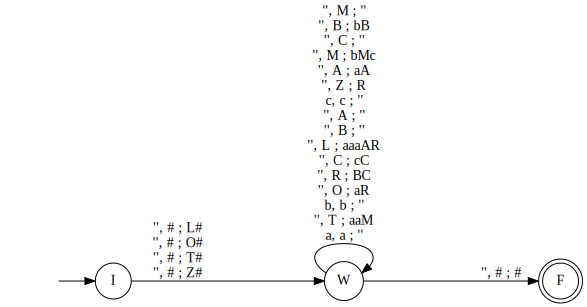

In [9]:
dotObj_pda(Lif, FuseEdges=True)

## Here are the tests to run, with the outcomes shown above!

In [10]:
explore_pda('', Lif)

String  accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', '', '#')
->  ('W', '', 'Z#')
->  ('W', '', 'R#')
->  ('W', '', 'BC#')
->  ('W', '', 'C#')
->  ('W', '', '#')
->  ('F', '', '#') .


In [11]:
explore_pda('aabbbccc', Lif, STKMAX=9) # (accept)

String aabbbccc accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', 'aabbbccc', '#')
->  ('W', 'aabbbccc', 'T#')
->  ('W', 'aabbbccc', 'aaM#')
->  ('W', 'abbbccc', 'aM#')
->  ('W', 'bbbccc', 'M#')
->  ('W', 'bbbccc', 'bMc#')
->  ('W', 'bbccc', 'Mc#')
->  ('W', 'bbccc', 'bMcc#')
->  ('W', 'bccc', 'Mcc#')
->  ('W', 'bccc', 'bMccc#')
->  ('W', 'ccc', 'Mccc#')
->  ('W', 'ccc', 'ccc#')
->  ('W', 'cc', 'cc#')
->  ('W', 'c', 'c#')
->  ('W', '', '#')
->  ('F', '', '#') .


In [12]:
explore_pda('aabbbbcccc', Lif) # (accept)

String aabbbbcccc accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', 'aabbbbcccc', '#')
->  ('W', 'aabbbbcccc', 'T#')
->  ('W', 'aabbbbcccc', 'aaM#')
->  ('W', 'abbbbcccc', 'aM#')
->  ('W', 'bbbbcccc', 'M#')
->  ('W', 'bbbbcccc', 'bMc#')
->  ('W', 'bbbcccc', 'Mc#')
->  ('W', 'bbbcccc', 'bMcc#')
->  ('W', 'bbcccc', 'Mcc#')
->  ('W', 'bbcccc', 'bMccc#')
->  ('W', 'bcccc', 'Mccc#')
->  ('W', 'bcccc', 'bMcccc#')
->  ('W', 'cccc', 'Mcccc#')
->  ('W', 'cccc', 'cccc#')
->  ('W', 'ccc', 'ccc#')
->  ('W', 'cc', 'cc#')
->  ('W', 'c', 'c#')
->  ('W', '', '#')
->  ('F', '', '#') .


In [13]:
explore_pda('aa', Lif) # (accept)

String aa accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', 'aa', '#')
->  ('W', 'aa', 'T#')
->  ('W', 'aa', 'aaM#')
->  ('W', 'a', 'aM#')
->  ('W', '', 'M#')
->  ('W', '', '#')
->  ('F', '', '#') .


In [14]:
explore_pda('abbbcccc', Lif) # (accept)

String abbbcccc accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', 'abbbcccc', '#')
->  ('W', 'abbbcccc', 'O#')
->  ('W', 'abbbcccc', 'aR#')
->  ('W', 'bbbcccc', 'R#')
->  ('W', 'bbbcccc', 'BC#')
->  ('W', 'bbbcccc', 'bBC#')
->  ('W', 'bbcccc', 'BC#')
->  ('W', 'bbcccc', 'bBC#')
->  ('W', 'bcccc', 'BC#')
->  ('W', 'bcccc', 'bBC#')
->  ('W', 'cccc', 'BC#')
->  ('W', 'cccc', 'C#')
->  ('W', 'cccc', 'cC#')
->  ('W', 'ccc', 'C#')
->  ('W', 'ccc', 'cC#')
->  ('W', 'cc', 'C#')
->  ('W', 'cc', 'cC#')
->  ('W', 'c', 'C#')
->  ('W', 'c', 'cC#')
->  ('W', '', 'C#')
->  ('W', '', '#')
->  ('F', '', '#') .


In [15]:
explore_pda('aaabbc', Lif) # (accept)

String aaabbc accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', 'aaabbc', '#')
->  ('W', 'aaabbc', 'L#')
->  ('W', 'aaabbc', 'aaaAR#')
->  ('W', 'aabbc', 'aaAR#')
->  ('W', 'abbc', 'aAR#')
->  ('W', 'bbc', 'AR#')
->  ('W', 'bbc', 'R#')
->  ('W', 'bbc', 'BC#')
->  ('W', 'bbc', 'bBC#')
->  ('W', 'bc', 'BC#')
->  ('W', 'bc', 'bBC#')
->  ('W', 'c', 'BC#')
->  ('W', 'c', 'C#')
->  ('W', 'c', 'cC#')
->  ('W', '', 'C#')
->  ('W', '', '#')
->  ('F', '', '#') .


In [16]:
explore_pda('aaabbc', Lif) # (accept)

String aaabbc accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', 'aaabbc', '#')
->  ('W', 'aaabbc', 'L#')
->  ('W', 'aaabbc', 'aaaAR#')
->  ('W', 'aabbc', 'aaAR#')
->  ('W', 'abbc', 'aAR#')
->  ('W', 'bbc', 'AR#')
->  ('W', 'bbc', 'R#')
->  ('W', 'bbc', 'BC#')
->  ('W', 'bbc', 'bBC#')
->  ('W', 'bc', 'BC#')
->  ('W', 'bc', 'bBC#')
->  ('W', 'c', 'BC#')
->  ('W', 'c', 'C#')
->  ('W', 'c', 'cC#')
->  ('W', '', 'C#')
->  ('W', '', '#')
->  ('F', '', '#') .


In [17]:
explore_pda('', Lif) # (accept)

String  accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', '', '#')
->  ('W', '', 'Z#')
->  ('W', '', 'R#')
->  ('W', '', 'BC#')
->  ('W', '', 'C#')
->  ('W', '', '#')
->  ('F', '', '#') .


In [18]:
explore_pda('abbcc', Lif) # (* fixed to be accept *)

String abbcc accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', 'abbcc', '#')
->  ('W', 'abbcc', 'O#')
->  ('W', 'abbcc', 'aR#')
->  ('W', 'bbcc', 'R#')
->  ('W', 'bbcc', 'BC#')
->  ('W', 'bbcc', 'bBC#')
->  ('W', 'bcc', 'BC#')
->  ('W', 'bcc', 'bBC#')
->  ('W', 'cc', 'BC#')
->  ('W', 'cc', 'C#')
->  ('W', 'cc', 'cC#')
->  ('W', 'c', 'C#')
->  ('W', 'c', 'cC#')
->  ('W', '', 'C#')
->  ('W', '', '#')
->  ('F', '', '#') .


In [19]:
explore_pda('cb', Lif) # (reject)

String cb rejected by your PDA :-(
Visited states are:
{('W', 'cb', '#'), ('W', 'cb', 'bBC#'), ('W', 'cb', 'BC#'), ('W', 'cb', 'O#'), ('W', 'cb', 'R#'), ('W', 'cb', 'L#'), ('W', 'cb', 'C#'), ('W', 'b', '#'), ('F', 'b', '#'), ('I', 'cb', '#'), ('W', 'cb', 'Z#'), ('W', 'cb', 'aR#'), ('F', 'cb', '#'), ('W', 'b', 'cC#'), ('W', 'cb', 'aaM#'), ('W', 'cb', 'cC#'), ('W', 'b', 'C#'), ('W', 'cb', 'T#'), ('W', 'cb', 'aaaAR#')}


In [20]:
explore_pda('aabbcca', Lif) # (reject)

String aabbcca rejected by your PDA :-(
Visited states are:
{('W', 'bbcca', 'aAR#'), ('W', 'cca', 'bMccc#'), ('W', 'aabbcca', 'T#'), ('I', 'aabbcca', '#'), ('W', 'abbcca', 'C#'), ('W', 'abbcca', 'R#'), ('W', 'bbcca', 'bMc#'), ('W', 'ca', 'c#'), ('W', 'aabbcca', 'aR#'), ('W', 'cca', 'Mcc#'), ('W', 'abbcca', 'bBC#'), ('W', 'aabbcca', 'aaM#'), ('W', 'abbcca', '#'), ('W', 'bcca', 'c#'), ('W', 'abbcca', 'aM#'), ('W', 'aabbcca', 'R#'), ('W', 'aabbcca', 'L#'), ('W', 'abbcca', 'cC#'), ('W', 'bbcca', 'M#'), ('W', 'aabbcca', 'bBC#'), ('W', 'aabbcca', 'C#'), ('W', 'aabbcca', 'aaaAR#'), ('W', 'abbcca', 'aaAR#'), ('W', 'aabbcca', 'cC#'), ('W', 'bcca', 'bMcc#'), ('W', 'aabbcca', 'Z#'), ('W', 'bcca', 'Mc#'), ('F', 'a', '#'), ('F', 'bbcca', '#'), ('W', 'abbcca', 'BC#'), ('W', 'cca', 'cc#'), ('F', 'abbcca', '#'), ('W', 'bbcca', '#'), ('W', 'aabbcca', '#'), ('W', 'a', '#'), ('F', 'aabbcca', '#'), ('W', 'aabbcca', 'O#'), ('W', 'aabbcca', 'BC#')}


In [21]:
explore_pda('abba', Lif) # (reject)

String abba rejected by your PDA :-(
Visited states are:
{('W', 'abba', 'C#'), ('W', 'abba', 'aaaAR#'), ('W', 'ba', 'bBC#'), ('W', 'ba', 'C#'), ('W', 'abba', '#'), ('F', 'bba', '#'), ('W', 'a', 'bBC#'), ('W', 'a', 'C#'), ('W', 'bba', 'BC#'), ('W', 'abba', 'T#'), ('F', 'abba', '#'), ('W', 'a', 'cC#'), ('W', 'abba', 'O#'), ('W', 'ba', '#'), ('W', 'abba', 'BC#'), ('W', 'bba', 'aaAR#'), ('W', 'ba', 'BC#'), ('F', 'a', '#'), ('W', 'abba', 'R#'), ('I', 'abba', '#'), ('W', 'bba', 'aM#'), ('W', 'abba', 'L#'), ('W', 'bba', 'cC#'), ('W', 'abba', 'bBC#'), ('W', 'abba', 'aR#'), ('W', 'abba', 'aaM#'), ('F', 'ba', '#'), ('W', 'a', 'BC#'), ('W', 'bba', 'R#'), ('W', 'bba', 'C#'), ('W', 'bba', '#'), ('W', 'a', '#'), ('W', 'abba', 'cC#'), ('W', 'bba', 'bBC#'), ('W', 'ba', 'cC#'), ('W', 'abba', 'Z#')}


In [22]:
explore_pda('ccac', Lif) # (reject)

String ccac rejected by your PDA :-(
Visited states are:
{('W', 'ccac', 'cC#'), ('W', 'ac', '#'), ('W', 'cac', '#'), ('W', 'ccac', 'R#'), ('W', 'ccac', 'L#'), ('I', 'ccac', '#'), ('W', 'ccac', 'T#'), ('W', 'ccac', 'Z#'), ('W', 'ccac', 'bBC#'), ('F', 'ccac', '#'), ('W', 'ccac', 'C#'), ('W', 'ccac', '#'), ('W', 'ac', 'cC#'), ('W', 'ccac', 'O#'), ('W', 'cac', 'C#'), ('W', 'cac', 'cC#'), ('W', 'ccac', 'BC#'), ('W', 'ac', 'C#'), ('F', 'cac', '#'), ('W', 'ccac', 'aR#'), ('W', 'ccac', 'aaM#'), ('F', 'ac', '#'), ('W', 'ccac', 'aaaAR#')}


In [23]:
 explore_pda('baac', Lif) # (reject)

String baac rejected by your PDA :-(
Visited states are:
{('W', 'baac', 'T#'), ('W', 'baac', 'Z#'), ('W', 'baac', 'C#'), ('W', 'baac', 'cC#'), ('W', 'aac', '#'), ('W', 'baac', 'O#'), ('F', 'aac', '#'), ('W', 'aac', 'C#'), ('W', 'baac', 'R#'), ('W', 'aac', 'bBC#'), ('W', 'baac', 'BC#'), ('W', 'baac', 'L#'), ('W', 'aac', 'BC#'), ('W', 'baac', 'bBC#'), ('F', 'baac', '#'), ('W', 'baac', '#'), ('W', 'aac', 'cC#'), ('W', 'baac', 'aaM#'), ('W', 'baac', 'aR#'), ('W', 'baac', 'aaaAR#'), ('I', 'baac', '#')}


In [24]:
explore_pda('ac', Lif) # (accept)

String ac accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', 'ac', '#')
->  ('W', 'ac', 'O#')
->  ('W', 'ac', 'aR#')
->  ('W', 'c', 'R#')
->  ('W', 'c', 'BC#')
->  ('W', 'c', 'C#')
->  ('W', 'c', 'cC#')
->  ('W', '', 'C#')
->  ('W', '', '#')
->  ('F', '', '#') .


# Question 2:

##  Part a: 12%

 

### Answer the questions from Calculator_with_Parse_Tree_Drawing.ipynb below. When you run that notebook, look for prompts for these questions Q1, Q2, Q3, Q4 (their answers are to be entered below)

- A1:

- A2:

- A3:

- A4:

# Answer the questions from Calculator_with_Parse_Tree_Drawing.ipynb below

## A1: Python parsed it as ```- (2 ** 2) ``` as the answer comes out in Python as ```-4```. In contrast, Jove produced ```4```, showing that it parsed the expression as ```(~2)^2```.

## A2: Python processed it as ```2**(-(3**-4))``` which gives ```0.9914791374956781```. Jove on the other hand processes it as ```2**((-3)**(-4))``` which yields ```1.008594091576999```

## A3: Both Jove and Python agree on the basic operators ```+,-,*,/``` and unary minus ```-``` that of course binds tighter than others. The answers agree: ```6*3/4*-5/(2+3-4-5-6/7*-8)--9.```

## A4: This is a webpage that summarizes operator precedences. I have not verified these though. https://codeplea.com/exponentiation-associativity-options

## Part b: 13%

- pdaEamb and pdaE are given in Drive_PDA_Based_Parsing.ipynb

- Please run that file BEFORE answering the questions below!

- In the designated spaces below, Produce and fill the sequence of IDs generated when parsing ```2+3*2``` using these PDA.

## This is the part where I am explaining how pdaE did its job

## The IDs when parsing using pdaE are as follows, and you can obtain this from explore_pda

```
->  ('I', '2+3*2', '#')
->  ('M', '2+3*2', 'E#')
->  ('M', '2+3*2', 'E+T#')
->  ('M', '2+3*2', 'T+T#')
->  ('M', '2+3*2', 'F+T#')
->  ('M', '2+3*2', '2+T#')
->  ('M', '+3*2', '+T#')
->  ('M', '3*2', 'T#')
->  ('M', '3*2', 'T*F#')
->  ('M', '3*2', 'F*F#')
->  ('M', '3*2', '3*F#')
->  ('M', '*2', '*F#')
->  ('M', '2', 'F#')
->  ('M', '2', '2#')
->  ('M', '', '#')
->  ('F', '', '#') .

```

## From this, you can determine that the derivation sequence is:

### ```E => E+T => T+T => F+T => 2+T => 2+T*F => 2+F*F => 2+3*F => 2+3*2```

## How so? Notice in the trace above, what got popped (E did) and what got pushed (E+T did). Then notice that E got poppoed again, and T+T got pushed in its place.

## Thus, one can piece together the parse-tree that emerges as follows (crude drawing):

```

E ----|
      |-----E  ------|
      |              |------ T ----|
      | ---  +       |             |------F --- 2  ...etc...
      |              | --- +       |
      |              |             | --- +
      |-----T        |------ T     |
                                   |------T
```

# Here, Calculation-Wise, I notice that "+" is performed last, if I were to draw a parse-tree

### Hence the answer would be 2 + (3*2) = 8


# OK NOW, you know how to answer the questions below about pdaEamb as prompted below


## What are the derivation sequence for the first parse of pdaEamb and the determination of the parse-tree?

- Answer:

##  Draw the parse-tree. Then scan and upload separately as pdaEamb_Tree1.pdf 

 
## Now, please write the derivation sequence by filling the table below

- Answer:

## Draw parse-tree now and keep it ready for uploading in your ZIP

## Is this answer calculated by this parse correct? Take into account which operation (+ or * ) got done first

- Answer: 

 
 
# REPEAT the above steps for the second parse

## Derivation sequence

## Answer correct?

## Now, hand-draw parse-tree, call it pdaEamb_Tree2.pdf and upload!




## THIS PART IS ANSWERED BY THE STUDENT (BELOW)

### ```E => E+E => 2+E => 2+E*E => 2+3*E => 2+3*2 (+ is done at the end)```

```
 Final state  ('F', '', '#')
 
Reached as follows:

->  ('I', '2+3*2', '#')
->  ('M', '2+3*2', 'E#')
->  ('M', '2+3*2', 'E+E#')
->  ('M', '2+3*2', '2+E#')
->  ('M', '+3*2', '+E#')
->  ('M', '3*2', 'E#')
->  ('M', '3*2', 'E*E#')
->  ('M', '3*2', '3*E#')
->  ('M', '*2', '*E#')
->  ('M', '2', 'E#')
->  ('M', '2', '2#')
->  ('M', '', '#'
->  ('F', '', '#') .
```

### Parsing this way produces the INCORRECT answer 10, as "2+3" is done first!


## THIS PART (BELOW) ALSO ANSWERED BY THE STUDENT

### ```E => E*E => E+E*E => 2+E*E => 2+3*E => 2+3*2 (* is done at the end)```

```
Final state  ('F', '', '#')
Reached as follows:
->  ('I', '2+3*2', '#')
->  ('M', '2+3*2', 'E#')
->  ('M', '2+3*2', 'E*E#')
->  ('M', '2+3*2', 'E+E*E#')
->  ('M', '2+3*2', '2+E*E#')
->  ('M', '+3*2', '+E*E#')
->  ('M', '3*2', 'E*E#')
->  ('M', '3*2', '3*E#')
->  ('M', '*2', '*E#')
->  ('M', '2', 'E#')
->  ('M', '2', '2#')
->  ('M', '', '#')
->  ('F', '', '#') .
```

### Parsing this way produces the CORRECT answer of 8

# Question 3: 25%

#  Answer the following questions Q1, Q2, and Q3 in RE2_NFA_PT.ipynb (repeated below). These questions appear at the very end of this notebook -- after you've run all the cells.





## Q1:   Look at the productions (the ```p_``` functions) in the cell at the very top and write down the context-free grammar encoded by them!


## =============== ... Answer Format ...


```


1) I located the function 

 p_expression_plus(t):
    'expression : expression PLUS catexp'
    ...
    
 From this I inferred one CFG rule where the PLUS token matches +
 
  expression --> expression + catexp
  
2) I located ...
  ...
  inferred the CFG rule
    ...rule...
    
3) ...

```







# Q2: I executed these commands after all the definitions have been executed

* (n1,t1) = drawPT(parseRE("(a*b*+cc)*"))

* (n2,t2) = drawPT(parseRE("(a*b)*+cc*"))

## Now, by comparing n1 and t1 (n1 being the NFA and t1 being its parse-tree), I conclude that the NFA is being parsed correctly for these reasons. I.e., the parse-tree tells you how the regexp was syntactically interpreted, and the NFA must reflect this. This is the logic you have to understand and explain. 

## For instance if you saw ab* + c being parsed, you must 

### see the NFA that stars b alone, 
### and then processes the concatenation, and
### finally does the + c part


```

* Reason...
* Reason...

````

## Repeat for n2 and t2


## Q3: Now, Explain the workings of all the mk_X_nfa functions by arguing that they are making the right output NFA from the input NFA. 

## In your explanation, explain how Q, Sigma, Delta, q0, and F are formed

### ================... YOUR EXPLANATIONS BEGINS HERE ...

### Explain each mk_X_nfa function in 3-4 lines each

### ================... YOUR EXPLANATIONS ENDS HERE ...

# Answer for Q3

```

    'expression : expression PLUS catexp'
    'expression : catexp'
    'catexp :  catexp ordyexp'
    'catexp :  ordyexp'
    'ordyexp : ordyexp STAR'
    'ordyexp : LPAREN expression RPAREN'
    'ordyexp : EPS'
    'ordyexp : STR'


i.e. 

R -> R + C | C
C -> C O | O
O -> O* | (R) | '' | a in Sigma

```

# Justification for the parsing of REs to produce NFA

```
(n1,t1) = drawPT(parseRE("(a*b*+cc)*"))

* This obviously parses as (a*b*   PLUS  cc) the whole starred

* This shows up as an NFA that follows a STAR done to the inner NFA that does an OR of a*b* and cc

(n2,t2) = drawPT(parseRE("(a*b)*+cc*"))

* This shows up as an FA that ORs the outer expressions. This shows up as two disconnected NFA, the upper
one being for cc*  and the lower one for (a*b)* as can be see by the construction of a*   which is concatenated with b,  and the whole thing is starred.

```

# Explanation of the mk_.. functions

### Explain each mk_X_nfa function in 3-4 lines each

```

def p_expression_plus(t):
    'expression : expression PLUS catexp'
    nfa = mk_plus_nfa(t[1]['nfa'], t[3]['nfa'])
    
MAKES the plus of two NFA obtained from t[1]'s nfa and t[3]'s nfa   

---

def p_expression_plus1(t):
    'expression : catexp'
    #
    t[0] = t[1]  

SIMPLY pass up t[1] as t[0]

---

def p_expression_cat(t):
    'catexp :  catexp ordyexp'
    #
    nfa = mk_cat_nfa(t[1]['nfa'], t[2]['nfa'])

Concat t[1]'s NFA and t[2]'s NFA

---

def p_expression_cat1(t):
    'catexp :  ordyexp'
    #
    t[0] = t[1] 
    

Pass up t[1] as t[0]

---    

# We employ field 'ast' of the dict to record the abstract syntax tree. 
# Field 'dig' holds a digraph. It too is a dict. 
# Its fields are nl for the node list and el for the edge list

def p_expression_ordy_star(t):
    'ordyexp : ordyexp STAR'
    #
    nfa = mk_star_nfa(t[1]['nfa'])


Stars t[1]'s NFA

---

def p_expression_ordy_paren(t):
    'ordyexp : LPAREN expression RPAREN'
    #
    nfa  = t[2]['nfa']

pass up expression's NFA (i.e. t[2]) as part of t[0]

---
    
def p_expression_ordy_eps(t):
    'ordyexp : EPS'
    #
    strn = '@'
    ast  = ('@', strn)           
    t[0] = { 'nfa' : mk_eps_nfa(),
             'ast' : ast,
             'dig' : {'nl' : [ strn + NxtStateStr("_") ],
                      'el' : []
                     }} 
    
def p_expression_ordy_str(t):
    'ordyexp : STR'
    #
    str = t[1]
    nfa_STR = mk_symbol_nfa(t[1])
    ast  = ('str', str)
    t[0] = {'nfa' : nfa_STR,
            'ast' : ast,
            'dig' : {'nl' : [ str + NxtStateStr("_") ],
                     'el' : [] 
                    }}
    

The above are primitive NFA


```


# Question 4: 25%

## Design a PDA for the CFG for #1 > #0 

# Many solutions below
## E for equality, R for rising
## J for jumping, T for tail


In [25]:
pdaRising_new = md2mc('''
PDA
I : '',#; S#  -> W
W : '',S; FRF -> W
W : '',R; 1R  -> W
W : '',R; 1   -> W
W : '',F; ERF -> W
W : '',F; EF  -> W
W : '',F; E   -> W
W : '',E; 0E1E -> W
W : '',E; 1E0E -> W
W : '',E; ''   -> W
W : 0,0;  ''   -> W
W : 1,1;  ''   -> W
W : '',#; #    -> F
'''
)

pdaRising = md2mc('''PDA
I : '', #  ; S#  -> W
W : '', S  ; FJT -> W
W : '', T  ; ET  -> W
W : '', T  ; JT  -> W
W : '', T  ; ''  -> W
W : '', J  ; 1J  -> W
W : '', J  ; 1   -> W
W : '', F  ; E   -> W
W : '', F  ; ''  -> W
W : '', E  ; 0E1E -> W
W : '', E  ; 1E0E -> W
W : '', E  ; ''   -> W
W : 1 , 1  ; ''   -> W
W : 0 , 0  ; ''   -> W
W : '', #  ; #   -> F
'''
)

# Run your PDA with these tests below using the pdaRising_new

In [26]:
explore_pda("1101111", pdaRising_new, STKMAX=7)  # increase STKMAX as needed - ACC

String 1101111 accepted by your PDA in 4 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', '1101111', '#')
->  ('W', '1101111', 'S#')
->  ('W', '1101111', 'FRF#')
->  ('W', '1101111', 'ERF#')
->  ('W', '1101111', 'RF#')
->  ('W', '1101111', '1RF#')
->  ('W', '101111', 'RF#')
->  ('W', '101111', '1F#')
->  ('W', '01111', 'F#')
->  ('W', '01111', 'ERF#')
->  ('W', '01111', '0E1ERF#')
->  ('W', '1111', 'E1ERF#')
->  ('W', '1111', '1ERF#')
->  ('W', '111', 'ERF#')
->  ('W', '111', 'RF#')
->  ('W', '111', '1RF#')
->  ('W', '11', 'RF#')
->  ('W', '11', '1RF#')
->  ('W', '1', 'RF#')
->  ('W', '1', '1F#')
->  ('W', '', 'F#')
->  ('W', '', 'E#')
->  ('W', '', '#')
->  ('F', '', '#') .
Final state  ('F', '', '#')
Reached as follows:
->  ('I', '1101111', '#')
->  ('W', '1101111', 'S#')
->  ('W', '1101111', 'FRF#')
->  ('W', '1101111', 'ERF#')
->  ('W', '1101111', 'RF#')
->  ('W', '1101111', '1F#')
->  ('W', '101111', 'F#')
->  ('W', '101111', 'ERF#')
->  ('W'

In [27]:
explore_pda("1101110", pdaRising_new, STKMAX=7)  # increase STKMAX as needed - ACC

String 1101110 accepted by your PDA in 4 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', '1101110', '#')
->  ('W', '1101110', 'S#')
->  ('W', '1101110', 'FRF#')
->  ('W', '1101110', 'ERF#')
->  ('W', '1101110', 'RF#')
->  ('W', '1101110', '1RF#')
->  ('W', '101110', 'RF#')
->  ('W', '101110', '1F#')
->  ('W', '01110', 'F#')
->  ('W', '01110', 'ERF#')
->  ('W', '01110', '0E1ERF#')
->  ('W', '1110', 'E1ERF#')
->  ('W', '1110', '1ERF#')
->  ('W', '110', 'ERF#')
->  ('W', '110', 'RF#')
->  ('W', '110', '1F#')
->  ('W', '10', 'F#')
->  ('W', '10', 'E#')
->  ('W', '10', '1E0E#')
->  ('W', '0', 'E0E#')
->  ('W', '0', '0E#')
->  ('W', '', 'E#')
->  ('W', '', '#')
->  ('F', '', '#') .
Final state  ('F', '', '#')
Reached as follows:
->  ('I', '1101110', '#')
->  ('W', '1101110', 'S#')
->  ('W', '1101110', 'FRF#')
->  ('W', '1101110', 'ERF#')
->  ('W', '1101110', 'RF#')
->  ('W', '1101110', '1F#')
->  ('W', '101110', 'F#')
->  ('W', '101110', 'ERF#')
->  ('

In [28]:
explore_pda("0011011100", pdaRising_new, STKMAX=7) # increase STKMAX as needed - REJ

String 0011011100 rejected by your PDA :-(
Visited states are:
{('W', '0', '#'), ('W', '', '1E0ERF#'), ('W', '', '1E0E1ERF#'), ('W', '00', '0EF#'), ('W', '0', '0EFRF#'), ('W', '', 'E1E1E#'), ('W', '', 'E1E0ERF#'), ('W', '0', '0E1E1ERF#'), ('W', '00', 'ERFRF#'), ('W', '0', '1E0E0ERF#'), ('W', '', '1EF#'), ('W', '', '1E0E1E1E#'), ('W', '0', '0E1E1EF#'), ('W', '0011011100', '0E1EFRF#'), ('W', '00', '1E0E#'), ('W', '0', '0E1ERF#'), ('W', '00', 'ERF#'), ('W', '00', '0ERF#'), ('W', '011011100', 'E1ERF#'), ('W', '1011100', 'E1ERF#'), ('W', '1100', '1RFRF#'), ('W', '0', 'E1E#'), ('F', '0', '#'), ('W', '11100', 'E1EFRF#'), ('W', '1100', '1FRF#'), ('W', '0', 'E0ERF#'), ('W', '', 'E1E1E0E0ERF#'), ('W', '1100', '1RF#'), ('W', '0', '0E1E1E0E0EFRF#'), ('W', '1011100', '1E0E1EFRF#'), ('W', '11100', 'E1ERF#'), ('W', '', '1E1E0E0ERF#'), ('W', '0', 'F#'), ('W', '11011100', '1E0E1E1ERF#'), ('W', '', '1E0E1E1E0E0EFRF#'), ('W', '', '1E0EFRF#'), ('W', '0', 'E#'), ('W', '0', '1E0E1EF#'), ('W', '', '1E0E1E#')

In [29]:
explore_pda("00110111001", pdaRising_new, STKMAX=7) # increase STKMAX as needed - ACC

String 00110111001 accepted by your PDA in 4 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', '00110111001', '#')
->  ('W', '00110111001', 'S#')
->  ('W', '00110111001', 'FRF#')
->  ('W', '00110111001', 'ERF#')
->  ('W', '00110111001', '0E1ERF#')
->  ('W', '0110111001', 'E1ERF#')
->  ('W', '0110111001', '0E1E1ERF#')
->  ('W', '110111001', 'E1E1ERF#')
->  ('W', '110111001', '1E1ERF#')
->  ('W', '10111001', 'E1ERF#')
->  ('W', '10111001', '1ERF#')
->  ('W', '0111001', 'ERF#')
->  ('W', '0111001', '0E1ERF#')
->  ('W', '111001', 'E1ERF#')
->  ('W', '111001', '1ERF#')
->  ('W', '11001', 'ERF#')
->  ('W', '11001', 'RF#')
->  ('W', '11001', '1F#')
->  ('W', '1001', 'F#')
->  ('W', '1001', 'E#')
->  ('W', '1001', '1E0E#')
->  ('W', '001', 'E0E#')
->  ('W', '001', '0E#')
->  ('W', '01', 'E#')
->  ('W', '01', '0E1E#')
->  ('W', '1', 'E1E#')
->  ('W', '1', '1E#')
->  ('W', '', 'E#')
->  ('W', '', '#')
->  ('F', '', '#') .
Final state  ('F', '', '#')
Reached 

In [30]:
explore_pda("00111", pdaRising_new, STKMAX=7) # increase STKMAX as needed - ACC

String 00111 accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', '00111', '#')
->  ('W', '00111', 'S#')
->  ('W', '00111', 'FRF#')
->  ('W', '00111', 'ERF#')
->  ('W', '00111', '0E1ERF#')
->  ('W', '0111', 'E1ERF#')
->  ('W', '0111', '0E1E1ERF#')
->  ('W', '111', 'E1E1ERF#')
->  ('W', '111', '1E1ERF#')
->  ('W', '11', 'E1ERF#')
->  ('W', '11', '1ERF#')
->  ('W', '1', 'ERF#')
->  ('W', '1', 'RF#')
->  ('W', '1', '1F#')
->  ('W', '', 'F#')
->  ('W', '', 'E#')
->  ('W', '', '#')
->  ('F', '', '#') .


In [31]:
explore_pda("0011100111", pdaRising_new, STKMAX=7) # increase STKMAX as needed - ACC

String 0011100111 accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', '0011100111', '#')
->  ('W', '0011100111', 'S#')
->  ('W', '0011100111', 'FRF#')
->  ('W', '0011100111', 'ERF#')
->  ('W', '0011100111', '0E1ERF#')
->  ('W', '011100111', 'E1ERF#')
->  ('W', '011100111', '0E1E1ERF#')
->  ('W', '11100111', 'E1E1ERF#')
->  ('W', '11100111', '1E1ERF#')
->  ('W', '1100111', 'E1ERF#')
->  ('W', '1100111', '1ERF#')
->  ('W', '100111', 'ERF#')
->  ('W', '100111', '1E0ERF#')
->  ('W', '00111', 'E0ERF#')
->  ('W', '00111', '0ERF#')
->  ('W', '0111', 'ERF#')
->  ('W', '0111', '0E1ERF#')
->  ('W', '111', 'E1ERF#')
->  ('W', '111', '1ERF#')
->  ('W', '11', 'ERF#')
->  ('W', '11', 'RF#')
->  ('W', '11', '1RF#')
->  ('W', '1', 'RF#')
->  ('W', '1', '1F#')
->  ('W', '', 'F#')
->  ('W', '', 'E#')
->  ('W', '', '#')
->  ('F', '', '#') .


In [32]:
explore_pda("001110011100", pdaRising_new, STKMAX=7) # increase STKMAX as needed - REJ

String 001110011100 rejected by your PDA :-(
Visited states are:
{('W', '10011100', '0E1EFRF#'), ('W', '0', '#'), ('W', '11100', '1E1E0EFRF#'), ('W', '', '1E0ERF#'), ('W', '', '1E0E1ERF#'), ('W', '10011100', 'FRF#'), ('W', '011100', '0E1E1E0EFRF#'), ('W', '00', '0EF#'), ('W', '0', '0EFRF#'), ('W', '001110011100', 'S#'), ('W', '1110011100', '1E0E1E1ERF#'), ('W', '011100', 'E1EF#'), ('W', '', 'E1E1E#'), ('W', '100', 'E0E1E0EFRF#'), ('W', '', 'E1E0ERF#'), ('W', '011100', '0E1E1E#'), ('W', '10011100', 'E0E1ERF#'), ('W', '00', 'ERFRF#'), ('W', '0', '1E0E0ERF#'), ('W', '', '1EF#'), ('W', '', '1E0E1E1E#'), ('W', '0', '0E1E1EF#'), ('W', '1100', 'E0E1E1E0ERF#'), ('W', '1100', '0E1E1EF#'), ('W', '00', '1E0E#'), ('W', '1100', 'E1E#'), ('W', '0', '0E1ERF#'), ('W', '1110011100', 'E1E1EFRF#'), ('W', '00', 'ERF#'), ('W', '00', '0ERF#'), ('W', '11100', '1E0E1E1EF#'), ('W', '01110011100', '0E1E1EFRF#'), ('W', '1100', '1RFRF#'), ('W', '0', 'E1E#'), ('F', '0', '#'), ('W', '11100', 'E1EFRF#'), ('W', '1100

In [33]:
explore_pda("00111011100", pdaRising_new, STKMAX=7) # increase STKMAX as needed - ACC

String 00111011100 accepted by your PDA in 2 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', '00111011100', '#')
->  ('W', '00111011100', 'S#')
->  ('W', '00111011100', 'FRF#')
->  ('W', '00111011100', 'ERF#')
->  ('W', '00111011100', '0E1ERF#')
->  ('W', '0111011100', 'E1ERF#')
->  ('W', '0111011100', '0E1E1ERF#')
->  ('W', '111011100', 'E1E1ERF#')
->  ('W', '111011100', '1E1ERF#')
->  ('W', '11011100', 'E1ERF#')
->  ('W', '11011100', '1ERF#')
->  ('W', '1011100', 'ERF#')
->  ('W', '1011100', 'RF#')
->  ('W', '1011100', '1F#')
->  ('W', '011100', 'F#')
->  ('W', '011100', 'E#')
->  ('W', '011100', '0E1E#')
->  ('W', '11100', 'E1E#')
->  ('W', '11100', '1E#')
->  ('W', '1100', 'E#')
->  ('W', '1100', '1E0E#')
->  ('W', '100', 'E0E#')
->  ('W', '100', '1E0E0E#')
->  ('W', '00', 'E0E0E#')
->  ('W', '00', '0E0E#')
->  ('W', '0', 'E0E#')
->  ('W', '0', '0E#')
->  ('W', '', 'E#')
->  ('W', '', '#')
->  ('F', '', '#') .
Final state  ('F', '', '#')
Reac

# Try the other CFG pdaRising now


In [34]:
explore_pda("1101111", pdaRising, STKMAX=7)  # increase STKMAX as needed - ACC

String 1101111 accepted by your PDA in 4 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', '1101111', '#')
->  ('W', '1101111', 'S#')
->  ('W', '1101111', 'FJT#')
->  ('W', '1101111', 'JT#')
->  ('W', '1101111', '1JT#')
->  ('W', '101111', 'JT#')
->  ('W', '101111', '1T#')
->  ('W', '01111', 'T#')
->  ('W', '01111', 'ET#')
->  ('W', '01111', '0E1ET#')
->  ('W', '1111', 'E1ET#')
->  ('W', '1111', '1ET#')
->  ('W', '111', 'ET#')
->  ('W', '111', 'T#')
->  ('W', '111', 'JT#')
->  ('W', '111', '1JT#')
->  ('W', '11', 'JT#')
->  ('W', '11', '1JT#')
->  ('W', '1', 'JT#')
->  ('W', '1', '1T#')
->  ('W', '', 'T#')
->  ('W', '', '#')
->  ('F', '', '#') .
Final state  ('F', '', '#')
Reached as follows:
->  ('I', '1101111', '#')
->  ('W', '1101111', 'S#')
->  ('W', '1101111', 'FJT#')
->  ('W', '1101111', 'JT#')
->  ('W', '1101111', '1T#')
->  ('W', '101111', 'T#')
->  ('W', '101111', 'ET#')
->  ('W', '101111', '1E0ET#')
->  ('W', '01111', 'E0ET#')
->  ('W', '

In [35]:
explore_pda("1101110", pdaRising, STKMAX=7)  # increase STKMAX as needed - ACC

String 1101110 accepted by your PDA in 4 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', '1101110', '#')
->  ('W', '1101110', 'S#')
->  ('W', '1101110', 'FJT#')
->  ('W', '1101110', 'JT#')
->  ('W', '1101110', '1JT#')
->  ('W', '101110', 'JT#')
->  ('W', '101110', '1T#')
->  ('W', '01110', 'T#')
->  ('W', '01110', 'ET#')
->  ('W', '01110', '0E1ET#')
->  ('W', '1110', 'E1ET#')
->  ('W', '1110', '1ET#')
->  ('W', '110', 'ET#')
->  ('W', '110', 'T#')
->  ('W', '110', 'JT#')
->  ('W', '110', '1T#')
->  ('W', '10', 'T#')
->  ('W', '10', 'ET#')
->  ('W', '10', '1E0ET#')
->  ('W', '0', 'E0ET#')
->  ('W', '0', '0ET#')
->  ('W', '', 'ET#')
->  ('W', '', 'T#')
->  ('W', '', '#')
->  ('F', '', '#') .
Final state  ('F', '', '#')
Reached as follows:
->  ('I', '1101110', '#')
->  ('W', '1101110', 'S#')
->  ('W', '1101110', 'FJT#')
->  ('W', '1101110', 'JT#')
->  ('W', '1101110', '1T#')
->  ('W', '101110', 'T#')
->  ('W', '101110', 'ET#')
->  ('W', '101110', '1

In [36]:
explore_pda("0011011100", pdaRising, STKMAX=7) # increase STKMAX as needed - REJ

String 0011011100 rejected by your PDA :-(
Visited states are:
{('W', '0', '1E0E0EJT#'), ('W', '011100', '0E1EJT#'), ('W', '1011100', '1EJT#'), ('W', '0', '#'), ('W', '11011100', '1E1EJT#'), ('W', '100', '#'), ('W', '', 'JT#'), ('W', '0011011100', 'EJT#'), ('W', '', '1E1ET#'), ('W', '100', '0EJT#'), ('W', '1100', '1JT#'), ('W', '', 'E1E1E0E0EJT#'), ('W', '0', 'E1ET#'), ('W', '', '1E0E1E1E0E0EJT#'), ('W', '100', 'E0EJT#'), ('W', '', 'E1ET#'), ('W', '0', 'E1E0E0EJT#'), ('W', '', '1JT#'), ('W', '1100', 'JT#'), ('W', '0011011100', 'FJT#'), ('W', '100', '1JT#'), ('W', '100', '0E1E0EJT#'), ('W', '', 'E1E0EJT#'), ('W', '100', 'T#'), ('W', '100', '1E0E0EJT#'), ('W', '11100', '1E0E1EJT#'), ('W', '100', 'ET#'), ('W', '0', '0E1ET#'), ('W', '011011100', '1E0E1EJT#'), ('W', '0', 'JT#'), ('F', '00', '#'), ('W', '0', '1ET#'), ('W', '0', '0E1E0EJT#'), ('W', '100', '1T#'), ('W', '', 'E1E1ET#'), ('W', '1100', '0E1EJT#'), ('W', '', '1E0EJT#'), ('W', '0', '0E1E1ET#'), ('W', '100', '1E0ET#'), ('W', '', '0E

In [37]:
explore_pda("00110111001", pdaRising, STKMAX=7) # increase STKMAX as needed - ACC

String 00110111001 accepted by your PDA in 2 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', '00110111001', '#')
->  ('W', '00110111001', 'S#')
->  ('W', '00110111001', 'FJT#')
->  ('W', '00110111001', 'EJT#')
->  ('W', '00110111001', '0E1EJT#')
->  ('W', '0110111001', 'E1EJT#')
->  ('W', '0110111001', '0E1E1EJT#')
->  ('W', '110111001', 'E1E1EJT#')
->  ('W', '110111001', '1E1EJT#')
->  ('W', '10111001', 'E1EJT#')
->  ('W', '10111001', '1EJT#')
->  ('W', '0111001', 'EJT#')
->  ('W', '0111001', '0E1EJT#')
->  ('W', '111001', 'E1EJT#')
->  ('W', '111001', '1EJT#')
->  ('W', '11001', 'EJT#')
->  ('W', '11001', '1E0EJT#')
->  ('W', '1001', 'E0EJT#')
->  ('W', '1001', '1E0E0EJT#')
->  ('W', '001', 'E0E0EJT#')
->  ('W', '001', '0E0EJT#')
->  ('W', '01', 'E0EJT#')
->  ('W', '01', '0EJT#')
->  ('W', '1', 'EJT#')
->  ('W', '1', 'JT#')
->  ('W', '1', '1T#')
->  ('W', '', 'T#')
->  ('W', '', '#')
->  ('F', '', '#') .
Final state  ('F', '', '#')
Reached as f

In [38]:
explore_pda("00111", pdaRising, STKMAX=7) # increase STKMAX as needed - ACC

String 00111 accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', '00111', '#')
->  ('W', '00111', 'S#')
->  ('W', '00111', 'FJT#')
->  ('W', '00111', 'EJT#')
->  ('W', '00111', '0E1EJT#')
->  ('W', '0111', 'E1EJT#')
->  ('W', '0111', '0E1E1EJT#')
->  ('W', '111', 'E1E1EJT#')
->  ('W', '111', '1E1EJT#')
->  ('W', '11', 'E1EJT#')
->  ('W', '11', '1EJT#')
->  ('W', '1', 'EJT#')
->  ('W', '1', 'JT#')
->  ('W', '1', '1T#')
->  ('W', '', 'T#')
->  ('W', '', '#')
->  ('F', '', '#') .


In [39]:
explore_pda("0011100111", pdaRising, STKMAX=7) # increase STKMAX as needed - ACC

String 0011100111 accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', '0011100111', '#')
->  ('W', '0011100111', 'S#')
->  ('W', '0011100111', 'FJT#')
->  ('W', '0011100111', 'EJT#')
->  ('W', '0011100111', '0E1EJT#')
->  ('W', '011100111', 'E1EJT#')
->  ('W', '011100111', '0E1E1EJT#')
->  ('W', '11100111', 'E1E1EJT#')
->  ('W', '11100111', '1E1EJT#')
->  ('W', '1100111', 'E1EJT#')
->  ('W', '1100111', '1EJT#')
->  ('W', '100111', 'EJT#')
->  ('W', '100111', '1E0EJT#')
->  ('W', '00111', 'E0EJT#')
->  ('W', '00111', '0EJT#')
->  ('W', '0111', 'EJT#')
->  ('W', '0111', '0E1EJT#')
->  ('W', '111', 'E1EJT#')
->  ('W', '111', '1EJT#')
->  ('W', '11', 'EJT#')
->  ('W', '11', 'JT#')
->  ('W', '11', '1JT#')
->  ('W', '1', 'JT#')
->  ('W', '1', '1T#')
->  ('W', '', 'T#')
->  ('W', '', '#')
->  ('F', '', '#') .


In [40]:
explore_pda("001110011100", pdaRising, STKMAX=7) # increase STKMAX as needed - REJ

String 001110011100 rejected by your PDA :-(
Visited states are:
{('I', '001110011100', '#'), ('W', '0', '#'), ('W', '11100', 'E1E1ET#'), ('W', '10011100', '1E0EJT#'), ('W', '', '1E0E1E1E0E0EJT#'), ('W', '110011100', 'E1EJT#'), ('W', '001110011100', 'S#'), ('W', '1100', 'E1ET#'), ('W', '1110011100', '1E1EJT#'), ('W', '', '1JT#'), ('W', '011100', 'E1ET#'), ('W', '01110011100', '1EJT#'), ('W', '10011100', '1JT#'), ('W', '100', '0E1E0EJT#'), ('W', '100', 'T#'), ('W', '001110011100', '1JT#'), ('W', '100', '1E0E0EJT#'), ('W', '11100', '0E1E1E1ET#'), ('W', '11100', '1E1ET#'), ('W', '0', '1ET#'), ('W', '1100', '0E1EJT#'), ('W', '10011100', 'E0E1EJT#'), ('W', '1100', '0E1E1ET#'), ('W', '', '1E0EJT#'), ('W', '11100', '1E1E0EJT#'), ('W', '0', '0E1E1ET#'), ('W', '100', '1E0ET#'), ('W', '', '0E1E1ET#'), ('W', '0', 'ET#'), ('F', '0', '#'), ('W', '00', 'JT#'), ('W', '11100', '1E0E1E1E0EJT#'), ('W', '11100', '0E1E1E1E0EJT#'), ('W', '011100', 'JT#'), ('W', '001110011100', '1E0EJT#'), ('W', '', '1E1E0E

In [41]:
explore_pda("00111011100", pdaRising, STKMAX=7) # increase STKMAX as needed - ACC

String 00111011100 accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', '00111011100', '#')
->  ('W', '00111011100', 'S#')
->  ('W', '00111011100', 'FJT#')
->  ('W', '00111011100', 'EJT#')
->  ('W', '00111011100', '0E1EJT#')
->  ('W', '0111011100', 'E1EJT#')
->  ('W', '0111011100', '0E1E1EJT#')
->  ('W', '111011100', 'E1E1EJT#')
->  ('W', '111011100', '1E1EJT#')
->  ('W', '11011100', 'E1EJT#')
->  ('W', '11011100', '1EJT#')
->  ('W', '1011100', 'EJT#')
->  ('W', '1011100', 'JT#')
->  ('W', '1011100', '1T#')
->  ('W', '011100', 'T#')
->  ('W', '011100', 'ET#')
->  ('W', '011100', '0E1ET#')
->  ('W', '11100', 'E1ET#')
->  ('W', '11100', '1ET#')
->  ('W', '1100', 'ET#')
->  ('W', '1100', '1E0ET#')
->  ('W', '100', 'E0ET#')
->  ('W', '100', '1E0E0ET#')
->  ('W', '00', 'E0E0ET#')
->  ('W', '00', '0E0ET#')
->  ('W', '0', 'E0ET#')
->  ('W', '0', '0ET#')
->  ('W', '', 'ET#')
->  ('W', '', 'T#')
->  ('W', '', '#')
->  ('F', '', '#') .